linear regression & gradient descent

train set:
r2 = 0.6797142141305208
mse = 0.9612595027082605

test set:
r2 = 0.7153580618888988
mse = 0.6382463496205611

 m,c: 5.17327843370645 10.045125935684363


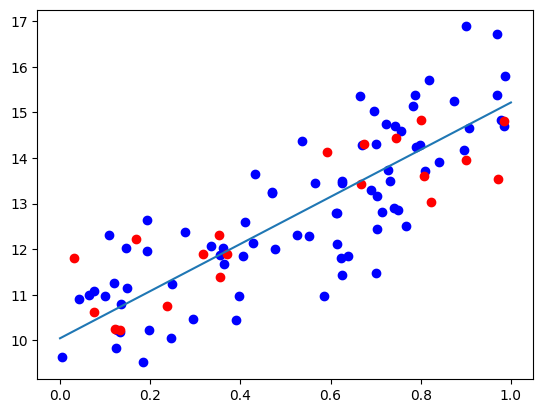

9012

 m,c,loss: 4.975928581853897 8.91067150935239 199.99217323544758
train set:
r2 = 0.16704789143836474
mse = 2.499902165443095

test set:
r2 = 0.042902277908412834
mse = 2.146079145641138


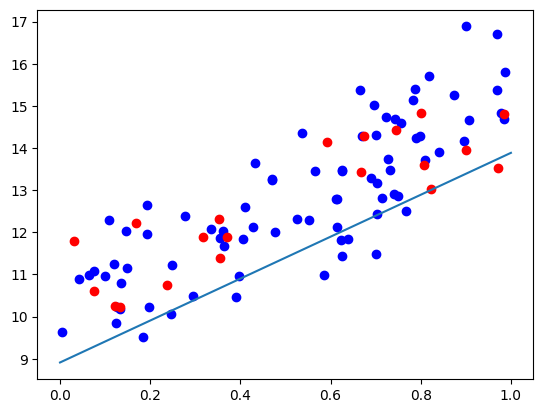

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = np.random.rand(100,1)
np.random.normal(0, 1, (100, 1))
y = 10 + 5 * x + np.random.normal(0,1,(100, 1))

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
plt.scatter(x_train, y_train,c = 'blue')
plt.scatter(x_test, y_test, c = 'red')
def LinearRegression(x,y):

  xm = np.mean(x)
  ym = np.mean(y)

  x1 = x - xm
  y1 = y - ym

  m = np.sum(x1*y1)/np.sum(x1*x1)
  c = ym - m*xm

  return m,c

 

def rmcalc(x,y,m,c):

  lrlist = m * x + c
  ym = np.mean(y)

  ly = len(y)
  r2 = 1 - np.sum((y - lrlist)**2)/(np.sum((y - ym)**2))
  print("r2 =",r2)
  mse = np.sum((y - lrlist)**2)/ly
  print("mse =",mse)

  return r2,mse

mtrain,ctrain = LinearRegression(x_train,y_train)
print("train set:")
rmcalc(x_train,y_train,mtrain,ctrain)
print("\ntest set:")
rmcalc(x_test,y_test,mtrain,ctrain)

print("\n m,c:",mtrain,ctrain)

a = np.linspace(0,1,10)
b = mtrain * a + ctrain
plt.plot(a,b)
plt.show()

'''
gradient descent
'''


iter = 10000
l = 0.0001


def gradientDescent(x,y,iter,lrate):
  m = 0
  c = 0
  yl = len(y)
  loss0 = 200
  fm = 0
  fc = 0
  for i in range (iter):
    yp = m * x + c
    loss1 = np.sum((y-yp)**2)
    if loss1 <= loss0:
      loss0 = loss1
      fm = m
      fc = c
      print(i)
      break

    dm = (-2/yl)*(np.sum(x*(y - yp)))
    dc = (-2/yl)*(np.sum(y - yp))
    m = m - lrate * dm
    c = c - lrate * dc

  print("\n m,c,loss:",fm,fc,loss0)
  
  return fm,fc

fm,fc = gradientDescent(x_train,y_train,iter,l)

print("train set:")
rmcalc(x_train,y_train,fm,fc)
print("\ntest set:")
rmcalc(x_test,y_test,fm,fc)


a = np.linspace(0,1,10)
b = fm * a + fc
plt.plot(a,b)
plt.scatter(x_train, y_train,c = 'blue')
plt.scatter(x_test, y_test, c = 'red')
plt.show()


# 3.1 linear regression with python library

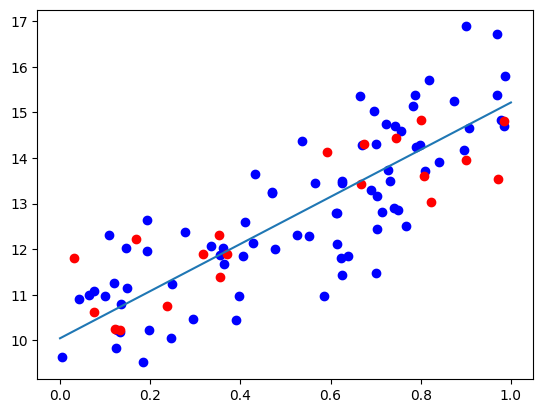

m,c: [5.17327843] [10.04512594]
train set:
r2 = 0.6797142141305208
mse = 0.9612595027082605

test set:
r2 = 0.7153580618888988
mse = 0.6382463496205611


(0.7153580618888988, 0.6382463496205611)

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

#Define model:
LR = LinearRegression()
#Fit on train dataset
model = LR.fit(x_train, y_train)

#model.predict(x)

m = model.coef_[0]
c = model.intercept_

plt.scatter(x_train, y_train,c = 'blue')
plt.scatter(x_test, y_test, c = 'red')

a = np.linspace(0,1,10)
b = m * a + c

plt.plot(a,b)
plt.show()

print("m,c:",m,c)
print("train set:")
rmcalc(x_train,y_train,m,c)
print("\ntest set:")
rmcalc(x_test,y_test,m,c)


# 3.2 polynomial regression

1 train set: 0.13698243449127145 1609.295161318793
1 test set: 0.2689877278752042 2684.011875304505
2 train set: 0.7587677017260579 449.83321994984396
2 test set: 0.7928755806821383 760.4857296017942
3 train set: 0.8511999891836548 277.47191596241794
3 test set: 0.8719166589107661 470.2755639285532
4 train set: 0.8888503764757836 207.264091101652
4 test set: 0.9412669521708029 215.6464451522651
5 train set: 0.8984776733592844 189.31177713911455
5 test set: 0.9396978176006627 221.40773806184308
6 train set: 0.8985211866676895 189.23063654653794
6 test set: 0.9396732907516306 221.49779175393041
7 train set: 0.8988840131386426 188.5540629663015
7 test set: 0.9357967773117124 235.73094282986966
8 train set: 0.8988886770339255 188.54536605860045
8 test set: 0.9358045657375071 235.70234655574404
9 train set: 0.8989340791623255 188.46070332580356
9 test set: 0.9356113766418919 236.41166683200078
feature [ 0.03163075  0.14600992  0.01441256 -0.65253497 -1.90482118  0.0503872
  6.49985004 10.85

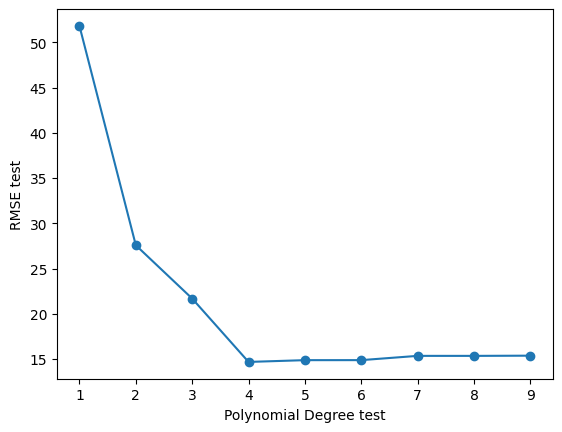

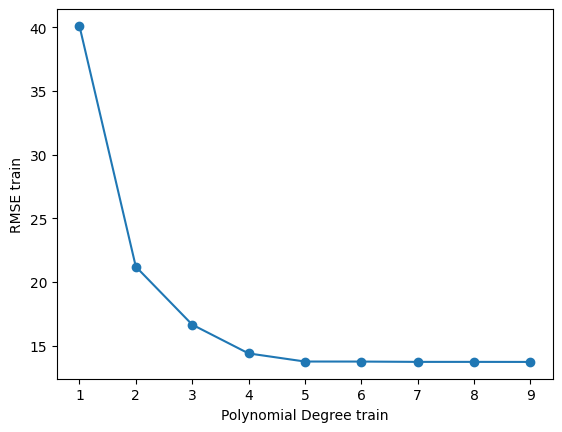

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read in the CSV file of polynomial data
df = pd.read_csv('/content/drive/MyDrive/EEC189/HW1/polydata.csv')

def rmse(x, y, model):
    y_pred = model(x)
    mse = np.mean((y - y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

def rm(x, y, model):
  y_pred = model(x)
  r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))
  mse = np.mean((y - y_pred)**2)
  return r2,mse

# Extract the x and y columns from the data
x = df['x']
y = df['y']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degrees = range(1,10)
rplotest=[]
rplotrain = []

for degree in degrees:
  pm = np.poly1d(np.polyfit(x_train, y_train, degree))

  rplotest.append(rmse(x_test,y_test,pm))
  rplotrain.append(rmse(x_train,y_train,pm))

  r2,mse = rm(x_train,y_train,pm)
  print(degree,"train set:",r2,mse)
  r2,mse = rm(x_test,y_test,pm)
  print(degree,"test set:",r2,mse)



print("feature",pm.coeffs)

plt.plot(degrees, rplotest, marker='o')
plt.xlabel('Polynomial Degree test')
plt.ylabel('RMSE test')
plt.show()

plt.plot(degrees, rplotrain, marker='o')
plt.xlabel('Polynomial Degree train')
plt.ylabel('RMSE train')
plt.show()







# polynomial with sklearn

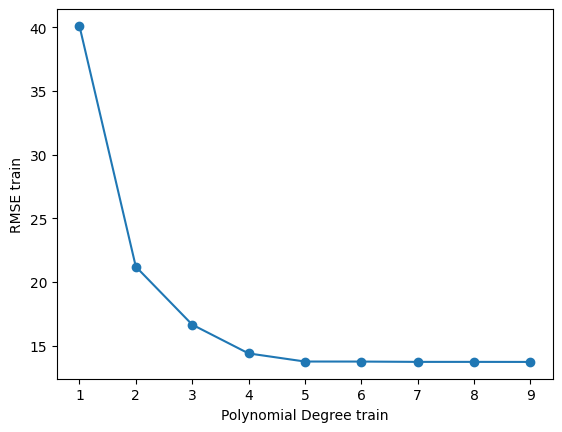

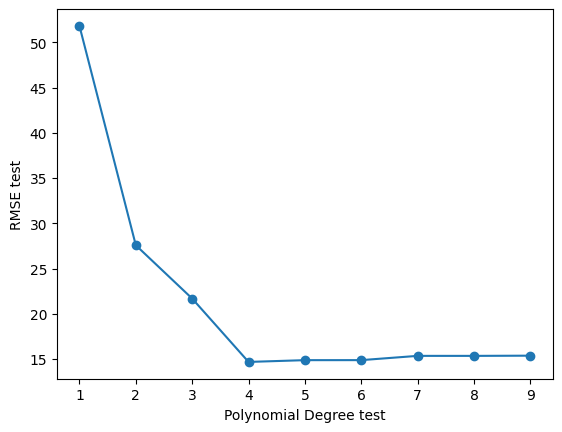

feature [ 0.          3.37205531 10.85038046  6.49985004  0.0503872  -1.90482118
 -0.65253497  0.01441256  0.14600992  0.03163075]


In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Read in the CSV file of polynomial data
df = pd.read_csv('/content/drive/MyDrive/EEC189/HW1/polydata.csv')

# Extract the x and y columns from the data
x = df['x']
y = df['y']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit polynomial regression models of different degrees


def skpoly(x_train,y_train):
  degrees = range(1, 10)
  rmse_vtr = []
  rmse_vte = []
  for degree in degrees:
      poly = PolynomialFeatures(degree=degree)
      X_poly_train = poly.fit_transform(x_train.values.reshape(-1, 1))
      LR = LinearRegression()
      model = LR.fit(X_poly_train, y_train)

      # Use the model to make predictions on the training and test sets
      y_pred_train = model.predict(X_poly_train)
      X_poly_test = poly.fit_transform(x_test.values.reshape(-1, 1))
      y_pred_test = model.predict(X_poly_test)

      # Calculate the RMSE values for the training and test sets
      rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
      rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

      # Store the RMSE values for this degree of polynomial
      rmse_vtr.append(rmse_train)
      rmse_vte.append(rmse_test)

  # Plot the RMSE values for each degree of polynomial
  plt.plot(degrees, rmse_vtr, marker='o')
  plt.xlabel('Polynomial Degree train')
  plt.ylabel('RMSE train')
  plt.show()

  plt.plot(degrees, rmse_vte, marker='o')
  plt.xlabel('Polynomial Degree test')
  plt.ylabel('RMSE test')
  plt.show()

  print("feature",model.coef_)

skpoly(x_train,y_train)


# 4. Multiple Linear Regression

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Intercept:  -37.02327770606409
Coefficients:  [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
train set
MSE:  0.5179331255246699
R-squared:  0.6125511913966952
test set
MSE:  0.5558915986952444
R-squared:  0.5757877060324508
degree2 polynomial Intercept:  203.7814556696656
degree2 polynomial Coefficients:  [ 6.02531539e-08 -1.19367676e+01 -8.42630146e-01  7.88415381e+00
 -3.83231200e+01 -2.27731139e-04  1.01743127e+00  8.28463988e+00
  5.70979224e+00 -3.09492552e-02  1.57708009e-03  3.95472134e-02
 -1.45652809e-01  5.14650357e-05 -4.48293709e-03 -1.63991940e-01
 -1.53482711e-01  2.09625937e-04 -5.40026171e-04  9.58827655e-03
  2.51416583e-06 -1.90982874e-03 -1.02793717e-02 -1.00025865e-02
  1.05983833e-02 -1.05963888e-01 -5.70066790e-05  2.09081102e-02
  1.06559793e-01  1

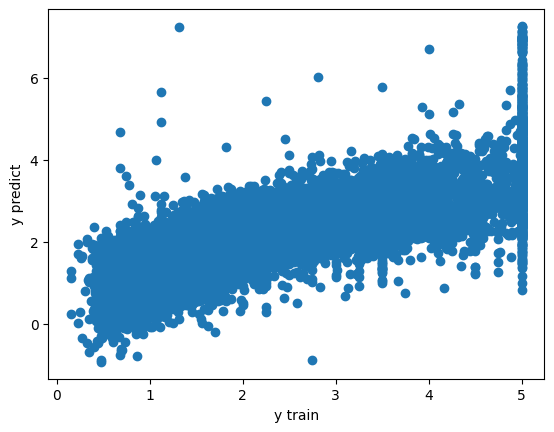

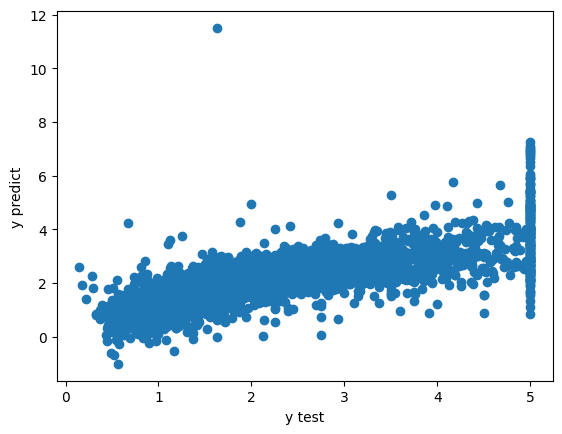

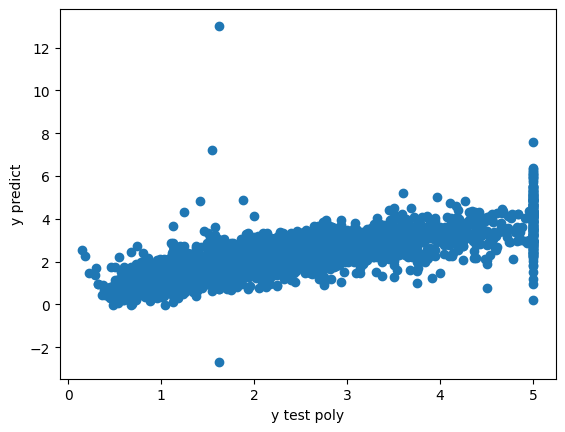

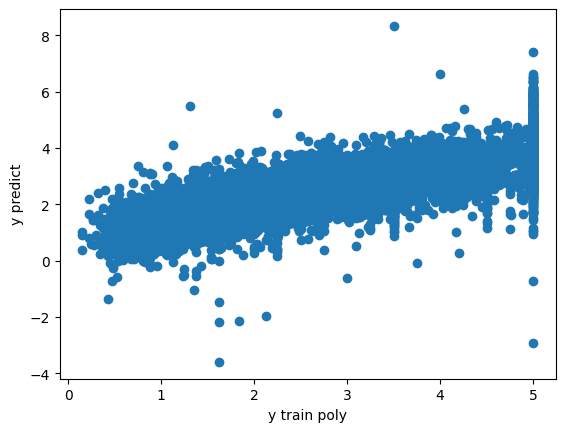

In [147]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target

# Explore the dataset
'''
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df['target'])
'''


# Prepare the dataset for linear regression
X = df.drop(['target'], axis=1)
y = df['target']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)
print("Intercept: ", LR.intercept_)
print("Coefficients: ", LR.coef_)

y_predtr = LR.predict(X_train)
mse = mean_squared_error(y_train, y_predtr)
r2 = r2_score(y_train, y_predtr)
print("train set")
print("MSE: ", mse)
print("R-squared: ", r2)
plt.figure()
plt.scatter(y_train, y_predtr)
plt.xlabel('y train')
plt.ylabel('y predict')

y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test set")
print("MSE: ", mse)
print("R-squared: ", r2)
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y test')
plt.ylabel('y predict')


# Train a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
polyreg = LinearRegression()
polyreg.fit(X_poly_train, y_train)
print("degree2 polynomial Intercept: ", polyreg.intercept_)
print("degree2 polynomial Coefficients: ", polyreg.coef_)
y_poly_pred = polyreg.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print("polynomial mse test: ", mse_poly)
print("polynomial r2 test: ", r2_poly)

y_poly_pred = polyreg.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
plt.figure()
plt.scatter(y_test, y_poly_pred)
plt.xlabel('y test poly')
plt.ylabel('y predict')

y_ptrain = polyreg.predict(X_poly_train)
mse = mean_squared_error(y_train, y_ptrain)
r2 = r2_score(y_train, y_ptrain)
print("polynomial mse train: ", mse)
print("polynomial r2 train: ", r2)

plt.figure()
plt.scatter(y_train, y_ptrain)
plt.xlabel('y train poly')
plt.ylabel('y predict')





# Compare the performance of the linear regression model with and without polynomial features
print("MSE without polynomial features: ", mse)
print("R-squared without polynomial features: ", r2)
print("MSE with polynomial features: ", mse_poly)
print("R-squared with polynomial features: ", r2_poly)

# Discuss the results and interpret the coefficients of the linear regression model
print("Coefficients: ", linreg.coef_)
